In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir(r"C:\Users\YAMIM\Desktop\Projects")

In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]=df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace({0:np.nan})


In [9]:
df.isnull().sum() 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
sm=SimpleImputer(strategy="median")
df1=sm.fit_transform(df)
df2=pd.DataFrame(df1, columns=df.columns)
# df2.head()

In [12]:
def out(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x
    

In [13]:
df3=df2.apply(lambda x: out(x))

In [14]:
y=df3["Outcome"]
x=df3.drop(columns=["Outcome"])

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [17]:
# help(logR)

In [18]:
logR=LogisticRegression(max_iter=10000, random_state=12)
logR.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=12)

In [19]:
print("Train Score",logR.score(x_train, y_train))
print("Test Score",logR.score(x_test, y_test))

Train Score 0.770949720670391
Test Score 0.7662337662337663


In [20]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
print("Train Score",dt.score(x_train, y_train))
print("Test Score",dt.score(x_test, y_test))

Train Score 1.0
Test Score 0.7619047619047619


In [22]:
x_train.shape

(537, 8)

In [23]:
param={"criterion":["gini", "entropy"],
      "max_depth":[3,5,7,9,11],
      "min_samples_split":[20,30,50, 70,100,120],
      "min_samples_leaf":[1,3,5,7,9,12,15,20]}
dt1=DecisionTreeClassifier()
gd_search=GridSearchCV(estimator=dt1, param_grid=param, cv=5,n_jobs=-1, verbose=1, refit=True)
gd_search.fit(x_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 12, 15, 20],
                         'min_samples_split': [20, 30, 50, 70, 100, 120]},
             verbose=1)

In [24]:
gd_search.best_score_

0.7504153686396677

In [25]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=50)

In [26]:
dtf=DecisionTreeClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=60)
dtf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=60)

In [27]:
print("Train Score",dtf.score(x_train, y_train))
print("Test Score",dtf.score(x_test, y_test))

Train Score 0.7914338919925512
Test Score 0.7575757575757576


In [28]:
from sklearn import metrics
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    
    fpr, tpr, threshold=metrics.roc_curve(act,probs )
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    return result

In [29]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

In [30]:
prob_train_1=logR.predict_proba(x_train)[:,1]
prob_test_1=logR.predict_proba(x_test)[:,1]

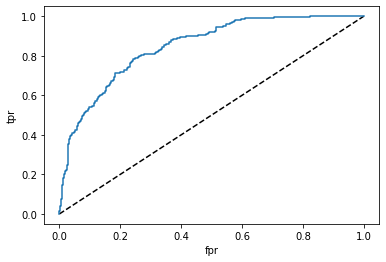

{'Accuracy': 0.770949720670391,
 'Recall': 0.5927835051546392,
 'Precision': 0.7232704402515723,
 'F1 score': 0.651558073654391,
 'AUC': 0.7322518108863575}

In [31]:
classification_eva(act=y_train, pred=pred_train, probs=prob_train_1)

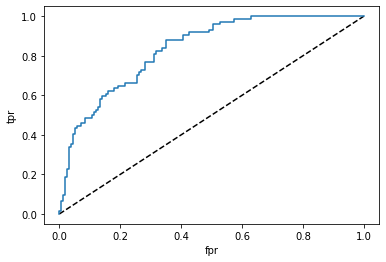

{'Accuracy': 0.7662337662337663,
 'Recall': 0.5,
 'Precision': 0.6851851851851852,
 'F1 score': 0.5781250000000001,
 'AUC': 0.6958598726114651}

In [32]:
classification_eva(act=y_test, pred=pred_test, probs=prob_test_1)

In [33]:
prob_train_1=logR.predict_proba(x_train)[:,1]
prob_test_1=logR.predict_proba(x_test)[:,1]

In [34]:
new_pred_train=np.where(prob_train_1>=.7, 1,0)
new_pred_test=np.where(prob_test_1>=.7, 1,0) 

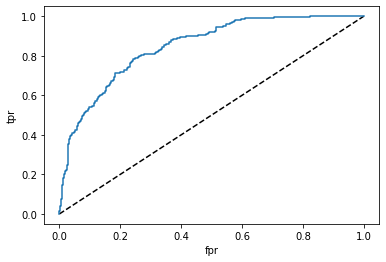

{'Accuracy': 0.7579143389199255,
 'Recall': 0.422680412371134,
 'Precision': 0.82,
 'F1 score': 0.5578231292517007,
 'AUC': 0.6851011391301735}

In [35]:
classification_eva(act=y_train, pred=new_pred_train, probs=prob_train_1)

In [36]:
pd.DataFrame(metrics.confusion_matrix(y_train, new_pred_train), columns=["Pred_0", "Pred_1"], index=["Act_0", "Act_1"])

,Pred_0,Pred_1
Act_0,325,18
Act_1,112,82


In [37]:
18+82

100

In [39]:
82/(82+18) #Precision 

0.82

In [40]:
112+82

194

In [41]:
82/(112+82) # R

0.422680412371134